In [2]:
import torch
import numpy as np 
import math

In [47]:
L,d_k,d_v=4,8,8# L is length of sequence like (My name is Pujan)
# d_k  is the size of the vector
q=np.random.randn(L,d_k)# 
k=np.random.randn(L,d_k)
v=np.random.randn(L,d_v)

print("Q \n: ",q)
print("K \n: ",k)
print("V \n: ",v)


Q 
:  [[-0.55395511  0.82502008  0.79312666  0.93502355  0.94040651  1.32711469
   2.99105756  1.61259289]
 [ 1.18183394 -0.27102588  0.21885728  1.23194984  0.83240225 -1.58498227
  -1.38170203 -0.79794461]
 [-0.97311106 -0.74447387 -1.5227077   1.04842902  0.96474213  1.48580703
   0.35060976  0.3257337 ]
 [-0.40992938  0.15064996 -0.60365594  0.46851353  0.27601868 -0.0374708
  -1.17497652 -1.82330622]]
K 
:  [[-0.58539302 -0.35366709 -0.73088193 -2.02295724 -0.73671076 -0.2880188
  -1.28145175  0.5196067 ]
 [-0.74790302 -1.74758247 -0.324164   -0.11396649  1.35995991 -0.25056458
  -1.69990416 -0.18125099]
 [ 1.43321202  0.05270126 -0.6274147  -0.31572724  0.11764587 -0.1385194
   0.34710975  1.06377522]
 [-0.51098319  0.36544485  1.85067388 -0.61070365 -0.64492664  1.59521044
   0.96687671  0.40912034]]
V 
:  [[ 0.43198323  0.3442155  -0.82618618 -0.05974258  0.62220363 -0.04605186
  -0.51370884 -0.37818605]
 [ 0.98240257  0.72290569  1.00714515 -0.69670926  0.49843284 -0.82482702


### Self Attention
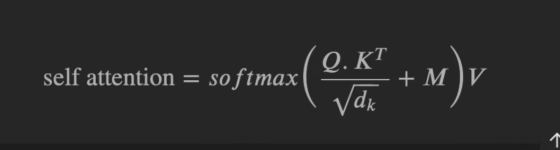

In [5]:
np.matmul(q,k.T) # Transpose of K matrix


array([[-1.87520245, -2.5586184 , -1.7401657 ,  0.65632392],
       [ 1.98905919,  3.78393547,  1.10568201,  1.42581612],
       [ 1.08018171, -1.40057782,  1.52037001, -1.55822046],
       [-0.99578464, -1.29833552, -2.44531303,  0.03895151]])

In [7]:
# why we use  root dK  
# we want to minimize the variance and stabilize the value of Q.kT 
q.var(),k.var(), np.matmul(q,k.T).var()

(0.6105695492685475, 0.9937172509709391, 3.2034740880197803)

In [12]:
# we want to minimize the variance and stabilize the value of Q.kT 
scaled=np.matmul(q,k.T)/math.sqrt(d_k)
print(scaled.var())

0.4004342610024725


In [31]:
print(scaled)

[[-0.66298419 -0.90460821 -0.61524148  0.23204555]
 [ 0.70323862  1.33782321  0.39091762  0.50410212]
 [ 0.38190191 -0.49517904  0.53753197 -0.55091413]
 [-0.35206303 -0.45903093 -0.86454871  0.01377144]]


### Masking
1. This is to ensure words dont get context of word generated in future words. 
2. Not required in the encoders , but required in the decoders

In [ ]:
# Masking that is M in our formula
# It is use in decoder part of the Transformer neural network
# we dont look at a future word when trying to generate the current context of the current word 


In [25]:
mask=np.tril(np.ones((L,L))) # tril means triangular
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [28]:
mask[mask==0]=-np.infty
mask[mask==1]=0

In [30]:
scaled+mask

array([[-0.66298419,        -inf,        -inf,        -inf],
       [ 0.70323862,  1.33782321,        -inf,        -inf],
       [ 0.38190191, -0.49517904,  0.53753197,        -inf],
       [-0.35206303, -0.45903093, -0.86454871,  0.01377144]])

#### Softmax
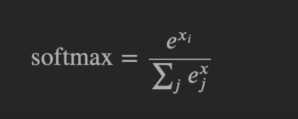

In [32]:
def softmax(x):
    return(np.exp(x).T/np.sum(np.exp(x),axis=1)).T

In [35]:
attention=softmax(scaled+mask)
print(attention)

[[1.         0.         0.         0.        ]
 [0.34647172 0.65352828 0.         0.        ]
 [0.3869386  0.1609647  0.4520967  0.        ]
 [0.25385376 0.22810144 0.15205962 0.36598518]]


In [37]:
attention=softmax(scaled)
print(attention)

[[0.18933439 0.14869403 0.19859298 0.4633786 ]
 [0.22535602 0.42507518 0.1649035  0.18466529]
 [0.33581461 0.13969735 0.39236374 0.13212431]
 [0.25385376 0.22810144 0.15205962 0.36598518]]


In [51]:
def softmax(x):
    return(np.exp(x).T/np.sum(np.exp(x),axis=1)).T

def scaled_dot_product_attention(q,k,v,mask=None):
    d_k=q.shape[1]
    scaled=np.matmul(q,k.T)/math.sqrt(d_k)
    if mask is not None:
        scaled=scaled+mask
    attention=softmax(scaled)
    out=np.matmul(attention,v)
    return out ,attention


In [52]:
L,d_k,d_v=4,8,8# L is length of sequence like (My name is Pujan)
# d_k  is the size of the vector
q=np.random.randn(L,d_k)# 
k=np.random.randn(L,d_k)
v=np.random.randn(L,d_v)




In [54]:
values,attention=scaled_dot_product_attention(q,k,v,mask=mask)
print("Query: \n",q)
print("Key: \n",k)
print("value: \n",v)
print("New values \n",values)
print("Attention \n",attention)


Query: 
 [[-0.50890205  2.26741462  1.58994094  0.53458132  0.99221333 -0.10893194
  -0.25411243 -1.17493248]
 [-0.8288471   2.54448931 -1.103419   -0.33080962 -0.15897952  1.02691212
  -0.85827741  0.63328057]
 [-1.32195809 -0.35308089  0.08815491  0.69059499 -0.05446759  0.51204664
   0.54435708 -0.39291435]
 [-0.1536574  -0.56612232 -0.65992221  0.22013308 -0.85161224 -0.34953218
  -2.32769497  0.61729503]]
Key: 
 [[-0.76107126  0.18424575  0.53538907  0.15506934  0.01362358 -0.70194706
   0.72274107 -1.30569083]
 [-0.78406515 -0.6987215  -0.79943814  0.05955738 -0.66773494  0.2738859
   0.48122215  0.10324447]
 [ 0.2548041   1.81484447 -1.20836493 -0.05173677  0.4700264  -0.80239036
  -2.17670434 -0.50274301]
 [ 0.20448678  1.3812817   1.33878153  1.3790472   0.66753886  0.87517689
  -0.0028487  -1.16912394]]
value: 
 [[-0.62173256  0.68366995 -0.74618884  1.9757276   0.18945134 -1.5557919
   0.71762118  0.73724043]
 [ 0.2751813   0.5244728  -1.00052459  0.84342846  0.88710457 -1.0